In [1]:
#!pip install gensim
#https://radimrehurek.com/gensim/models/keyedvectors.html
#nltk.download('punkt')

In [2]:
#!pip install html2text
#!python -m spacy link en_core_web_md en_default

In [3]:
import pandas as pd
import numpy as np
import os
from bs4 import BeautifulSoup
import time
import spacy
import re
import nltk
import timeit
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

df_train = pd.read_csv('share_repurchase_paragraphs.csv')
df_train = df_train.apply(lambda x: x.astype(str).str.lower())

# Next Steps: Considering skipping everything before Item 8

In [7]:
friendly_lists = {}

friendly_lists.update({'share_repurchase_auth' : ['board of director', 'of directors authoriz', 'of up to', 'our board of', 'the repurchase of', "'s board of",
'share repurchase program', 'the board of', 'of directors approv', 'authorized the repurchase',
"company 's board", 'directors authorized a', 'repurchase up to', 'repurchase of up']})

friendly_lists.update({'Unknown_Share_Repurchase_Data' : ['board of director', 'of directors authoriz', 'of up to', "'s board of", 'authorized the repurchase',
'the repurchase of', 'the board of', 'directors authorized the', "company 's board",'repurchase up to', 'our board of', 'repurchase of up', 'to repurchase up', 'share repurchase program']})

friendly_lists.update({'Share_Repurchase_Intention' : ['board of directors', 'share repurchase program', 'stock repurchase program',
'remained available for', 'our board of', 'repurchase up to', 'share repurchase authorization',
'available under the', 'to repurchase up', 'repurchase under the', 'under the program']})

friendly_lists.update({'Share_Repurchase_Utilization' : ['a total of', 'for a total', 'a total cost', 'total cost of', 'aggregate cost of', 
'company had repurchased', 'repurchased a total', 'as of december', 'of december 31']})

friendly_lists.update({'Amount_Spent_on_Share_Repurchases' : ['a cost of', 'total cost of', 'at a cost', 'of common stock', 'a total cost', 'aggregate cost of',
'for a total', 'at a total', 'a total of', 'cost of shares', 'of shares repurchased', 'at an aggregate', 'an aggregate cost',
'in millions', 'repurchase of common']})

friendly_lists.update({'Share_Repurchase_Count' : ['a cost of', 'total cost of', 'at a cost', 'of common stock', 'a total cost',
'aggregate cost of', 'for a total', 'at a total', 'a total of', 'cost of shares', 'of shares repurchased', 
'at an aggregate', 'an aggregate cost', 'in millions', 'repurchase of common', 'aggregate purchase price', 'cost of repurchase']})

In [20]:
start = time.time()
path = "data/nc_validation_filings_test/"
file_pattern = r"[\d-]+"
compiled_df = pd.DataFrame(columns=['list','acc','text'])  # creating blank df with named columns

acc = []
sent = []                               # creating empty lists to append in loop
friendly_name = []

for filename in os.listdir(path):
     if filename.endswith('.html'):
        fname = os.path.join(path,filename)
        accession = re.findall(file_pattern, fname)
        with open(fname, 'r', encoding="utf8") as f:
            soup = BeautifulSoup(f.read(),'html.parser')
            soup.head.extract()
            soup = soup.get_text().strip()
            sentences = nltk.sent_tokenize(soup)     #tokenized sentences
            for cats,values in friendly_lists.items():
                for ngram in values:
                    for sentence in sentences:
                        if ngram in sentence:
                            sent.append(sentence)
                            friendly_name.append(cats)
                            acc.append(accession[0])

compiled_df = compiled_df.append(pd.DataFrame({'list':friendly_name, 'acc':acc, 'text':sent}), ignore_index=True)

compiled_df['text'] = compiled_df['text'].str.lower()
#compiled_df.drop_duplicates(keep='first', inplace=True)
#compiled_df = compiled_df.reset_index()

# stripping out unicode characters created from new line, other doc strings, and extra spaces#
compiled_df['text'] = compiled_df['text'].str.replace(u'\n',' ')
compiled_df['text'] = compiled_df['text'].str.replace(u'\ufeff',' ')
compiled_df['text'] = compiled_df['text'].str.replace('  ',' ')
compiled_df['text'] = compiled_df['text'].str.replace('  ',' ')
compiled_df['text'] = compiled_df['text'].str.replace('  ',' ')

end = time.time()
print(end-start)

7.809549570083618


In [5]:
compiled_df

index                   acc                           list  \
0        0  0000007332-18-000016          share_repurchase_auth   
1        1  0000007332-18-000016          share_repurchase_auth   
2        2  0000007332-18-000016          share_repurchase_auth   
3        3  0000007332-18-000016          share_repurchase_auth   
4        4  0000007332-18-000016          share_repurchase_auth   
5        5  0000007332-18-000016          share_repurchase_auth   
6        6  0000007332-18-000016          share_repurchase_auth   
7        7  0000007332-18-000016          share_repurchase_auth   
8        8  0000007332-18-000016          share_repurchase_auth   
9        9  0000007332-18-000016          share_repurchase_auth   
10      10  0000007332-18-000016  Unknown_Share_Repurchase_Data   
11      11  0000007332-18-000016  Unknown_Share_Repurchase_Data   
12      12  0000007332-18-000016  Unknown_Share_Repurchase_Data   
13      13  0000007332-18-000016  Unknown_Share_Repurchase_Data   
14      14  0000007332-18-000016  Unknown_Share_Repurchase_Data   
15      15  0000007332-18-000016  Unknown_Share_Repurchase_Data   
16      16  0000007332-18-000016  Unknown_Share_Repurchase_Data   
17      17  0000007332-18-000016  Unknown_Share_Repurchase_Data   
18      18  0000007332-18-000016  Unknown_Share_Repurchase_Data   
19      19  0000007332-18-000016  Unknown_Share_Repurchase_Data   
20      20  0000007332-18-000016     Share_Repurchase_Intention   
21      21  0000007332-18-000016     Share_Repurchase_Intention   
22      22  0000007332-18-000016     Share_Repurchase_Intention   
23      23  0000007332-18-000016     Share_Repurchase_Intention   
24      24  0000007332-18-000016     Share_Repurchase_Intention   
25      25  0000007332-18-000016   Share_Repurchase_Utilization   
26      26  0000007332-18-000016   Share_Repurchase_Utilization   
27      27  0000007332-18-000016   Share_Repurchase_Utilization   
28      28  0000007332-18-000016   Share_Repurchase_Utilization   
29      29  0000007332-18-000016   Share_Repurchase_Utilization   
..     ...                   ...                            ...   
304    304  0000020520-18-000007         Share_Repurchase_Count   
305    305  0000020520-18-000007         Share_Repurchase_Count   
306    306  0000020520-18-000007         Share_Repurchase_Count   
307    307  0000020520-18-000007         Share_Repurchase_Count   
308    308  0000020520-18-000007         Share_Repurchase_Count   
309    309  0000020520-18-000007         Share_Repurchase_Count   
310    310  0000020520-18-000007         Share_Repurchase_Count   
311    311  0000020520-18-000007         Share_Repurchase_Count   
312    312  0000020520-18-000007         Share_Repurchase_Count   
313    313  0000020520-18-000007         Share_Repurchase_Count   
314    314  0000020520-18-000007         Share_Repurchase_Count   
315    315  0000020520-18-000007         Share_Repurchase_Count   
316    316  0000020520-18-000007         Share_Repurchase_Count   
317    317  0000020520-18-000007         Share_Repurchase_Count   
318    318  0000020520-18-000007         Share_Repurchase_Count   
319    319  0000020520-18-000007         Share_Repurchase_Count   
320    320  0000020520-18-000007         Share_Repurchase_Count   
321    321  0000020520-18-000007         Share_Repurchase_Count   
322    322  0000020520-18-000007         Share_Repurchase_Count   
323    323  0000020520-18-000007         Share_Repurchase_Count   
324    324  0000020520-18-000007         Share_Repurchase_Count   
325    325  0000020520-18-000007         Share_Repurchase_Count   
326    326  0000020520-18-000007         Share_Repurchase_Count   
327    327  0000020520-18-000007         Share_Repurchase_Count   
328    328  0000020520-18-000007         Share_Repurchase_Count   
329    329  0000020520-18-000007         Share_Repurchase_Count   
330    330  0000020520-18-000007         Share_Repurchase_Count   
331    331  0000020520-18-000007         Share_Repur

In [6]:
compiled_df.list.value_counts()

Amount_Spent_on_Share_Repurchases    148
Share_Repurchase_Count               148
Unknown_Share_Repurchase_Data         12
share_repurchase_auth                 12
Share_Repurchase_Utilization           8
Share_Repurchase_Intention             6
Name: list, dtype: int64

In [ ]:
------------------------------------
 intentional fault to stop full run
------------------------------------

In [32]:
#nltk.Text(soup).concordance("December")

In [130]:
#compiled_df.to_csv('two_files_process.csv')

# attempting word2vec

In [64]:
toked_sent = df_train.apply(lambda row: nltk.word_tokenize(row['paragraph_text']), axis=1)

In [91]:
# https://machinelearningmastery.com/develop-word-embeddings-python-gensim/
model = Word2Vec(toked_sent, workers=8, window=15)
words = list(model.wv.vocab)

In [92]:
model.train(toked_sent, total_examples=len(toked_sent), epochs=10)

(931653, 1745200)

In [93]:
w1 = 'authorized'
model.wv.most_similar(positive=w1)

[('approved', 0.7848131656646729),
 ('500', 0.5573139190673828),
 ('3.0', 0.515275776386261),
 ('authorization', 0.4908831715583801),
 ('program', 0.48660850524902344),
 ('new', 0.47024673223495483),
 ('authorizations', 0.43838274478912354),
 ('5.0', 0.4311782121658325),
 ('8.0', 0.4288358688354492),
 ('12-month', 0.4253584146499634)]

In [94]:
w2 = 'repurchased'
model.wv.most_similar(positive=w2)

[('retired', 0.5808227062225342),
 ('cost', 0.575123131275177),
 ('approximately', 0.5655322670936584),
 ('purchased', 0.5418485403060913),
 ('million', 0.5272030830383301),
 ('5.2', 0.4673740863800049),
 ('weighted', 0.4670262336730957),
 ('251', 0.4614979028701782),
 ('3.4', 0.4612703323364258),
 ('6.9', 0.4596707820892334)]

In [97]:
w3 = 'shares'
model.wv.most_similar(positive=w3)

[('214.8', 0.4298517107963562),
 ('34.8', 0.42362871766090393),
 ('occidental', 0.4180801212787628),
 ('4.2', 0.40964654088020325),
 ('approximately', 0.4017295241355896),
 ('10.4', 0.40076643228530884),
 ('5.2', 0.4007262587547302),
 ('retired', 0.39858606457710266),
 ('20.35', 0.39267879724502563),
 ('11.3', 0.3913756012916565)]

In [98]:
model.wv.similarity(w1,w3)

0.02015567462125388

In [96]:
model.wv.similarity(w1,w2)

-0.0524488903454259

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


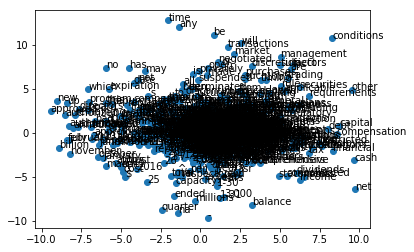

In [99]:
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)

for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [100]:
print(model)

Word2Vec(vocab=1459, size=100, alpha=0.025)


In [29]:
------------------------------------
 intentional fault to stop full run
------------------------------------

SyntaxError: invalid syntax (<ipython-input-29-ebdd3a797a3a>, line 1)

## old code below to keep for testing

In [162]:
# working --- keeping as backup #
start = time.time()

path = "data/nc_validation_filings_test"
file_pattern = r"[\d-]+"

for filename in os.listdir(path):
     if filename.endswith('.html'):
        fname = os.path.join(path,filename)
        with open(fname, 'r', encoding="utf8") as f:
            soup = BeautifulSoup(f.read(),'html.parser')
            soup.head.extract()
            soup = soup.get_text().strip()
            sentences = nltk.sent_tokenize(soup)
# creating df of sentences matched to accession numbers. Making sure the two lists are the same size before appending to df
            value = [sentence for sentence in sentences if "repurchase" in sentence]
            key = re.findall(file_pattern, fname) 
            compiled_df = compiled_df.append(pd.DataFrame({'acc': key, 'text': value}), ignore_index=True)

compiled_df['text'] = compiled_df['text'].str.lower()

# stripping out unicode characters created from new line, other doc strings, and extra spaces#
compiled_df['text'] = compiled_df['text'].str.replace(u'\n',' ')
compiled_df['text'] = compiled_df['text'].str.replace(u'\ufeff',' ')
compiled_df['text'] = compiled_df['text'].str.replace('  ',' ')
compiled_df['text'] = compiled_df['text'].str.replace('  ',' ')
compiled_df['text'] = compiled_df['text'].str.replace('  ',' ')

end = time.time()
print(end-start)
compiled_df

8.181015491485596


In [166]:
compiled_df.head()

acc  index                   list  \
0  [0000007332-18-000016]    0.0  share_repurchase_auth   
1  [0000007332-18-000016]    1.0  share_repurchase_auth   
2  [0000007332-18-000016]    2.0  share_repurchase_auth   
3  [0000007332-18-000016]    3.0  share_repurchase_auth   
4  [0000007332-18-000016]    4.0  share_repurchase_auth   

                                                text  
0  in addition, protective provisions in our amen...  
1  the types of incentives that may be awarded ar...  
2  the registrant's other certifying officer and ...  
3  the registrant's other certifying officer and ...  
4  we also have guarantee obligations of up to $8...

In [50]:
# generator didn't work....
'''start = time.time()

path = "data/nc_validation_filings_test"
file_pattern = r"[\d-]+"
guess_list = ['board of directors','shares']

for filename in os.listdir(path):
     if filename.endswith('.html'):
        fname = os.path.join(path,filename)
        with open(fname, 'r', encoding="utf8") as f:
            soup = BeautifulSoup(f.read(),'html.parser')
            soup.head.extract()
            soup = soup.get_text().strip()
            sentences = nltk.sent_tokenize(soup)
# creating df of sentences matched to accession numbers. Making sure the two lists are the same size before appending to df
            value = [x for x in sentences if x in guess_list in sentence]
#            value = [guess for guess in sentences if guess_list in guess]    
            key = re.findall(file_pattern, fname) * len(value)
            compiled_df = compiled_df.append(pd.DataFrame({'acc': key, 'text': value}), ignore_index=True)

compiled_df['text'] = compiled_df['text'].str.lower()

end = time.time()
print(end-start)'''

'start = time.time()\n\npath = "data/nc_validation_filings_test"\nfile_pattern = r"[\\d-]+"\nguess_list = [\'board of directors\',\'shares\']\n\nfor filename in os.listdir(path):\n     if filename.endswith(\'.html\'):\n        fname = os.path.join(path,filename)\n        with open(fname, \'r\', encoding="utf8") as f:\n            soup = BeautifulSoup(f.read(),\'html.parser\')\n            soup.head.extract()\n            soup = soup.get_text().strip()\n            sentences = nltk.sent_tokenize(soup)\n# creating df of sentences matched to accession numbers. Making sure the two lists are the same size before appending to df\n            value = [x for x in sentences if x in guess_list in sentence]\n#            value = [guess for guess in sentences if guess_list in guess]    \n            key = re.findall(file_pattern, fname) * len(value)\n            compiled_df = compiled_df.append(pd.DataFrame({\'acc\': key, \'text\': value}), ignore_index=True)\n\ncompiled_df[\'text\'] = compiled_df

'UNITED STATES SECURITIES AND EXCHANGE\nCOMMISSION\nWashington, D.C. 20549\nFORM 10-K\n\ufeff\n☒ ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE\nSECURITIES EXCHANGE ACT OF 1934\nFor the fiscal year ended December 31, 2017\nor\n\ufeff\n☐ TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF\nTHE SECURITIES EXCHANGE ACT OF 1934\nFor the transition period from _________ to ___________\n\ufeff\nCommission file number 001-11001\n\ufeff\n\n\ufeff\nFRONTIER COMMUNICATIONS CORPORATION\n(Exact name of registrant as specified in its charter)\n\ufeff\n\n\n\n\n\ufeff\n\n\n\n\n\n\n\n\n\n\nDelaware\n\n\n\n\n\n06-0619596\n\n\n\n\n(State or other jurisdiction of\n\n\n\n\n\n(I.R.S. Employer Identification No.)\n\n\n\n\nincorporation or organization)\n\n\n\n\n\n\n\n\n\n\n\ufeff\n\n\n\n\n\n\n\n\n\n\n401 Merritt 7\n\n\n\n\n\n\n\n\n\n\nNorwalk, Connecticut\n\n\n\n\n\n06851\n\n\n\n\n(Address of principal executive offices)\n\n\n\n\n\n(Zip Code)\n\n\n\n\n\ufeff\n\n\n\n\n\n\n\n\n\n\nRegistrant\'s telepho

In [154]:
##########################################
#    pasting for reference purposes     #
########################################

# https://spacy.io/usage/training#ner
#!/usr/bin/env python
# coding: utf8
"""Example of training spaCy's named entity recognizer, starting off with an
existing model or a blank model.

For more details, see the documentation:
* Training: https://spacy.io/usage/training
* NER: https://spacy.io/usage/linguistic-features#named-entities

Compatible with: spaCy v2.0.0+
"""

from __future__ import unicode_literals, print_function

import plac
import random
from pathlib import Path
import spacy


# training data
TRAIN_DATA = [
    ('Who is Shaka Khan?', {
        'entities': [(7, 17, 'PERSON')]
    }),
    ('I like London and Berlin.', {
        'entities': [(7, 13, 'LOC'), (18, 24, 'LOC')]
    })
]


@plac.annotations(
    model=("Model name. Defaults to blank 'en' model.", "option", "m", str),
    output_dir=("Optional output directory", "option", "o", Path),
    n_iter=("Number of training iterations", "option", "n", int))
def main(model=None, output_dir=None, n_iter=100):
    """Load the model, set up the pipeline and train the entity recognizer."""
    if model is not None:
        nlp = spacy.load(model)  # load existing spaCy model
        print("Loaded model '%s'" % model)
    else:
        nlp = spacy.blank('en')  # create blank Language class
        print("Created blank 'en' model")

    # create the built-in pipeline components and add them to the pipeline
    # nlp.create_pipe works for built-ins that are registered with spaCy
    if 'ner' not in nlp.pipe_names:
        ner = nlp.create_pipe('ner')
        nlp.add_pipe(ner, last=True)
    # otherwise, get it so we can add labels
    else:
        ner = nlp.get_pipe('ner')

    # add labels
    for _, annotations in TRAIN_DATA:
        for ent in annotations.get('entities'):
            ner.add_label(ent[2])

    # get names of other pipes to disable them during training
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
    with nlp.disable_pipes(*other_pipes):  # only train NER
        optimizer = nlp.begin_training()
        for itn in range(n_iter):
            random.shuffle(TRAIN_DATA)
            losses = {}
            for text, annotations in TRAIN_DATA:
                nlp.update(
                    [text],  # batch of texts
                    [annotations],  # batch of annotations
                    drop=0.5,  # dropout - make it harder to memorise data
                    sgd=optimizer,  # callable to update weights
                    losses=losses)
            print(losses)

    # test the trained model
    for text, _ in TRAIN_DATA:
        doc = nlp(text)
        print('Entities', [(ent.text, ent.label_) for ent in doc.ents])
        print('Tokens', [(t.text, t.ent_type_, t.ent_iob) for t in doc])

    # save model to output directory
    if output_dir is not None:
        output_dir = Path(output_dir)
        if not output_dir.exists():
            output_dir.mkdir()
        nlp.to_disk(output_dir)
        print("Saved model to", output_dir)

        # test the saved model
        print("Loading from", output_dir)
        nlp2 = spacy.load(output_dir)
        for text, _ in TRAIN_DATA:
            doc = nlp2(text)
            print('Entities', [(ent.text, ent.label_) for ent in doc.ents])
            print('Tokens', [(t.text, t.ent_type_, t.ent_iob) for t in doc])


#if __name__ == '__main__':
#    plac.call(main)

    # Expected output:
    # Entities [('Shaka Khan', 'PERSON')]
    # Tokens [('Who', '', 2), ('is', '', 2), ('Shaka', 'PERSON', 3),
    # ('Khan', 'PERSON', 1), ('?', '', 2)]
    # Entities [('London', 'LOC'), ('Berlin', 'LOC')]
    # Tokens [('I', '', 2), ('like', '', 2), ('London', 'LOC', 3),
    # ('and', '', 2), ('Berlin', 'LOC', 3), ('.', '', 2)]

In [147]:
#df_train['paragraph_text'][1]

In [146]:
#df_train[df_train['ticker'] == 'aapl']

In [145]:
#df_train.data_key_friendly_name.value_counts()

In [144]:
#df_train[df_train["data_key_friendly_name"] == 'share repurchase authorization']

In [143]:
#df_train[df_train["data_key_friendly_name"] == 'share repurchase authorization'].text.unique()

In [148]:
nlp = spacy.load('en')
doc = nlp(soup)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)


ORDINAL 











ORG UNITED STATES SECURITIES AND EXCHANGE
COMMISSION
GPE 

GPE Washington
GPE D.C.
CARDINAL 20549

GPE 

GPE 

ORG ANNUAL
ORG THE
SECURITIES EXCHANGE ACT
DATE the fiscal year ended December 31, 2017

FAC 
﻿
☐ TRANSITION REPORT PURSUANT
DATE 1934
ORG _
ORG _
ORG _
PERSON _
PERSON _
ORDINAL _
ORG 
﻿
Commission
MONEY 001-11001

ORG 
FRONTIER COMMUNICATIONS CORPORATION

ORG Exact
GPE 

GPE Delaware
CARDINAL 06-0619596
GPE 




(State
PERSON 






ORG I.R.S. Employer Identification
GPE 





DATE 










﻿
CARDINAL 401
PRODUCT Merritt 7
GPE Norwalk
GPE Connecticut
GPE 





PERSON 






PERSON Zip Code
GPE 





CARDINAL 203
DATE 614-5600

ORG 
Securities
ORG 










Title
PERSON 





Name
ORG 




Common Stock
MONEY 0.25
GPE 

CARDINAL 






ORG The NASDAQ Stock Market LLC




Series A
PERCENT 11.125%
ORG Mandatory Convertible Preferred Stock
EVENT Series
ORG The NASDAQ Stock Market LLC

ORG The NASDAQ Global Select Market




﻿

LAW Section 12(g
GPE 

GPE 

G

MONEY $75 million
GPE 

CARDINAL 17
MONEY $28 million
DATE 2017
DATE 2016
GPE 

DATE future years
GPE 

GPE 

GPE 

GPE 

GPE 

GPE 

EVENT 
Pension
GPE 

GPE 

GPE 

CARDINAL 18
ORG FRONTIER COMMUNICATIONS CORPORATION
GPE 

GPE 

GPE 

GPE 

GPE 

GPE 

GPE 

ORG Frontier
MONEY $165 million
PERCENT 2%
DATE 2017
GPE 

MONEY $170 million
PERCENT 2%
DATE 2016
GPE 

GPE 

ORG Frontier
GPE 

ORG Frontier
GPE 

ORG FCC
GPE 

GPE 

GPE 

DATE 2011
ORG FCC
DATE 2011
ORG Intercarrier Compensation
GPE 

GPE 

ORG The 2011 Order
CARDINAL zero
GPE 

DATE 2017
DATE 2018
ORG VoIP

GPE 

ORG FCC
GPE 

ORG the Universal Service Fund
GPE 

GPE 

GPE 

ORG the 2011 Order
ORG Intercarrier Compensation
ORG The FCC

GPE 

ORG FCC
GPE 

GPE 

GPE 

GPE 

DATE August 2017
ORG FCC
GPE 

GPE 

GPE 

GPE 

GPE 

GPE 

GPE 

ORG FCC
GPE 

GPE 

GPE 

GPE 

GPE 

GPE 

GPE 

ORG Frontier
GPE 

GPE 

GPE 

GPE 

ORG Frontier
MONEY $395 million
PERCENT 4%
DATE 2017
MONEY $409 million
PERCENT 5%
GPE 

DATE 2016
ORG


ORG 












































ORG 












































PERSON ﻿






DATE the year ended December 31
MONEY 





$ Increase
PERSON 








MONEYGPE 

DATE 2015
CARDINAL 250,000
GPE 

ORG the CTF Acquisition
DATE 2016
GPE 

CARDINAL 38,000
GPE 

DATE 2016
ORG CTF

DATE monthly
ORG ARPC
GPE 

MONEY 17.16
PERCENT 2%
MONEY 673.72
GPE 

DATE 2016
DATE 2015
ORG ARPC
GPE 

ORG CTF
ORG ARPC
ORG SME
GPE 

GPE 

GPE 

GPE 

DATE 2016
PERCENT 8%
GPE 

ORG Frontier
DATE 2016
GPE 

GPE 

DATE December 31, 2016
CARDINAL approximately 1.8 million
GPE 

DATE December 31, 2015
CARDINAL 2,052,000
GPE 

CARDINAL approximately 243,000
GPE 

DATE December 31, 2016
PERCENT 57%
CARDINAL 6
PERCENT 29%
DATE December 31
GPE 

DATE 2015
GPE 

GPE 

PERSON Vantage
GPE 

GPE Connecticut
GPE South Carolina
GPE Minnesota
GPE Illinois
LOC FiOS
GPE 

GPE California
GPE Texas
GPE Florida
GPE Indiana
GPE Oregon
GPE 

GPE Washington
GPE 

DATE the year
GPE 

CARDINAL 1,165,00

ORG Current Report
DATE January
3, 1995
ORG 





CARDINAL 4.3
DATE August 1991
DATE June 15, 1995
GPE 

ORG Frontier
ORG JPMorgan Chase Bank, N.A.
ORG Chemical Bank
ORG Trustee
GPE 

PERCENT 7.45%
DATE 2035
ORG Exhibit 4.100.8
ORG Frontier
ORG Current Report
DATE March 29,
1996
DATE March 29, 1996
DATE August 1991
DATE October 15,
1995
ORG Frontier
ORG JPMorgan Chase Bank, N.A.
ORG Chemical Bank
ORG Trustee
GPE 

PERCENT 7%
DATE 2025
ORG Exhibit 4.100.9
DATE the March 29, 1996 8-K
ORG 





CARDINAL 4.5
ORG 


Seventh Supplemental Indenture
DATE August 1991
DATE June 1,
1996
ORG Frontier
ORG JPMorgan Chase Bank, N.A.
ORG Chemical Bank
ORG Trustee
GPE 

PERCENT 6.8%
DATE 2026
ORG Frontier
ORG Annual Report
DATE Form 10-K
DATE the year
ended December 31, 1996
CARDINAL 56
ORG 


Eighth Supplemental Indenture
DATE August 1991
DATE December 1,
1996
ORG Frontier
ORG JPMorgan Chase Bank, N.A.
ORG Chemical Bank
ORG Trustee
GPE 

PERCENT 7.05%
DATE 2046
ORG Exhibit
DATE 1996
GPE 





CARDINAL


MONEY $ in millions)

DATE ﻿




﻿
ORG Entities
PERSON Consolidated Frontier
ORG 











































Current
MONEY 





$
ORG 


-
CARDINAL 362
ORG 





MONEY 



CARDINAL 362
MONEY $69








CARDINAL 650
QUANTITY 199







CARDINAL 30
GPE 








-
CARDINAL 67
DATE 







-








DATE 








-







109
DATE 







43
DATE 21







-







64
PERSON 








CARDINAL 693
QUANTITY 758







GPE 







CARDINAL 1,323
GPE ﻿











































Property
DATE 







11,546
DATE 2,831







-








CARDINAL 14,377
PERSON Goodwill
DATE 







5,457
NORP 







DATE 







-







7,024
DATE 







1,923
NORP 







DATE 







-








CARDINAL 2,063
GPE 







DATE 







31
DATE 66







-








PERSON 








CARDINAL 3,486
CARDINAL 1,788
GPE 







CARDINAL 11,879
DATE 







-








PERSON 





$
CARDINAL 16,149
ORG 





CARDINAL 19,044
DATE 





MONEY 


CARDINAL 10,309
CARDINAL 24,884
PERSON ﻿
OR

GPE 

GPE 

GPE 

GPE 

GPE 

ORG Frontier
GPE 

ORG Indemnitee
CARDINAL 18
ORG Headings
GPE References
GPE 

ORG Pronouns
GPE 

GPE 

GPE 

CARDINAL 10
CARDINAL 19
ORG 





GPE 

GPE 

GPE Delaware
GPE 

GPE Delaware
GPE 

EVENT this
Agreement
ORG Indemnitee
EVENT this
Agreement
CARDINAL one
GPE 

ORG Agreement
ORG Frontier
ORG Frontier
GPE 

ORG Indemnitee
GPE 

ORG Indemnitee
GPE 

ORG Indemnitee
GPE 

ORG Indemnitee
ORG Expenses
GPE 

ORG Frontier
GPE 

GPE Indemnitee
GPE 

ORG Frontier
GPE 

GPE 

GPE 

ORG Expenses
GPE 

CARDINAL two
GPE 

GPE 

GPE 

GPE 

ORG Frontier
GPE Indemnitee
ORGORG 


Illinois




Frontier Communications Services Inc.
GPE Arizona
ORG Frontier Directory Services Company
ORG LLC


Delaware





GPE Florida
ORG LLC


Florida





ORG Frontier Infoservices Inc.
GPE 



GPE Delaware
ORG Frontier Midstates Inc.
ORG 


Georgia
ORG LLC


Delaware





GPE Wisconsin
ORG Frontier Security Company
ORG 


Delaware





ORG Frontier Services Corp.
ORG 


Connecticu

In [ ]:
df = pd.read_html(str(table), header=0)[0]

In [141]:
text = soup.strip(' \t\n\r')
text = text.strip()

In [142]:
text

'UNITED STATES SECURITIES AND EXCHANGE\nCOMMISSION\nWashington, D.C. 20549\nFORM 10-K\n\ufeff\n☒ ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE\nSECURITIES EXCHANGE ACT OF 1934\nFor the fiscal year ended December 31, 2017\nor\n\ufeff\n☐ TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF\nTHE SECURITIES EXCHANGE ACT OF 1934\nFor the transition period from _________ to ___________\n\ufeff\nCommission file number 001-11001\n\ufeff\n\n\ufeff\nFRONTIER COMMUNICATIONS CORPORATION\n(Exact name of registrant as specified in its charter)\n\ufeff\n\n\n\n\n\ufeff\n\n\n\n\n\n\n\n\n\n\nDelaware\n\n\n\n\n\n06-0619596\n\n\n\n\n(State or other jurisdiction of\n\n\n\n\n\n(I.R.S. Employer Identification No.)\n\n\n\n\nincorporation or organization)\n\n\n\n\n\n\n\n\n\n\n\ufeff\n\n\n\n\n\n\n\n\n\n\n401 Merritt 7\n\n\n\n\n\n\n\n\n\n\nNorwalk, Connecticut\n\n\n\n\n\n06851\n\n\n\n\n(Address of principal executive offices)\n\n\n\n\n\n(Zip Code)\n\n\n\n\n\ufeff\n\n\n\n\n\n\n\n\n\n\nRegistrant\'s telepho

In [1]:
'''doc = nlp(soup)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)
'''

'doc = nlp(soup)\n\n# Print all of the found entities and their labels\nfor ent in doc.ents:\n    print(ent.label_, ent.text)\n'

In [2]:
import html2text

path = "data/nc_validation_filings_test/"
file = "0000007332-18-000016.html"
html = open(path+file, encoding="utf8").read()
#print html2text.html2text(html)